In [37]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [38]:
# 데이터 확인
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [39]:

print(df.info())  # 데이터 타입과 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [40]:
df.isnull().mean()* 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


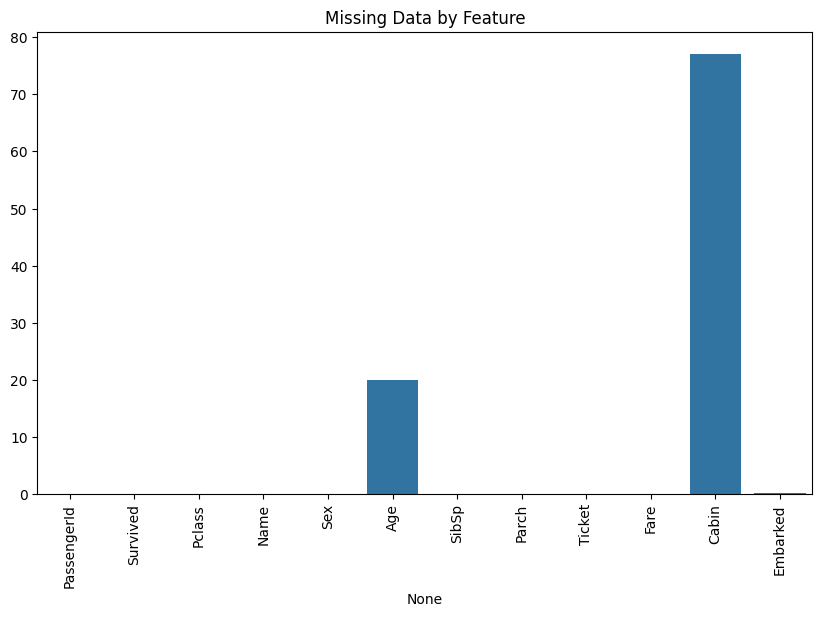

In [41]:
# 결측치 비율 확인
missing_data = df.isnull().mean() * 100
print(missing_data)

# 결측치 비율 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Missing Data by Feature')
plt.xticks(rotation=90)
plt.show()

In [42]:
# 기본적인 결측치 처리 (Age, Cabin, Embarked 변수에 결측치가 존재)
# Age의 결측치는 평균값으로 채워주고, Embarked는 가장 빈도 높은 값으로 채워줍니다.
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin 변수는 결측치가 많아서 'Unknown'으로 채워줍니다.
df['Cabin'].fillna('Unknown', inplace=True)
print("column before drop", df.columns)

column before drop Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


/var/folders/w5/_14ckm9x10lb_j7dz73z0rjc0000gn/T/ipykernel_92095/1447044677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/w5/_14ckm9x10lb_j7dz73z0rjc0000gn/T/ipykernel_92095/1447044677.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

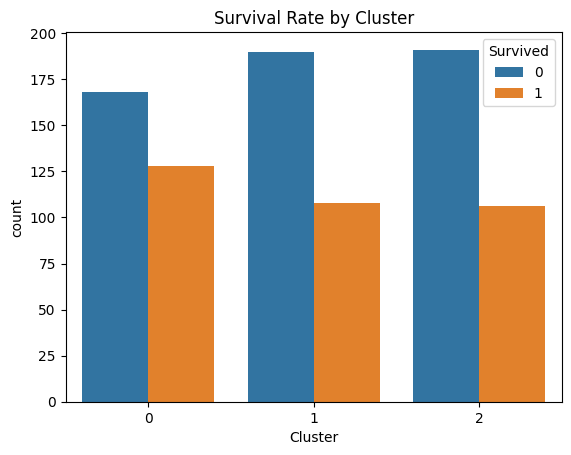

In [43]:
from sklearn.cluster import KMeans

# 숫자형 변수만 사용하여 클러스터링
numeric_df = df.select_dtypes(include=[float, int]).drop('Survived', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(numeric_df)

# 클러스터별 생존율 시각화
sns.countplot(x='Cluster', hue='Survived', data=df)
plt.title('Survival Rate by Cluster')
plt.show()

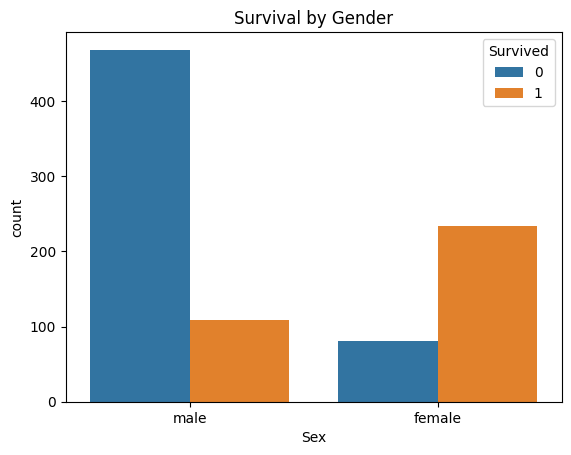

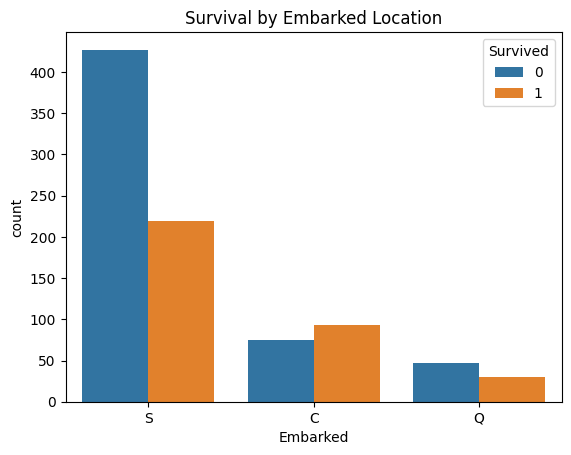

In [44]:
#성별과 생존여부 관계 분석
#남자보다 여자가 생존확률이 높았다.
#S 항구에서 승선한 사람의 생존확률이 낮았지만 null값이 최빈값인 S로 대체된 영향이 있는거 같다.
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Location')
plt.show()

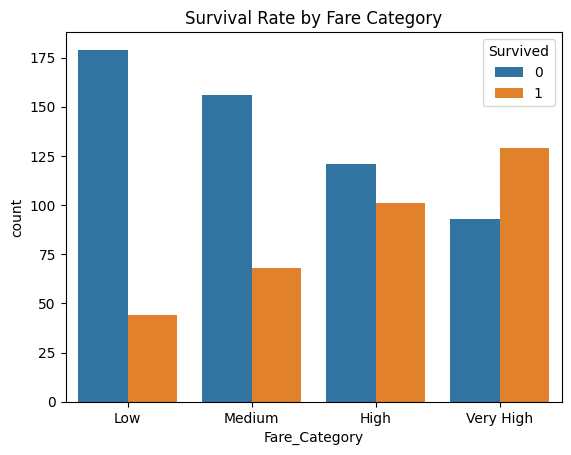

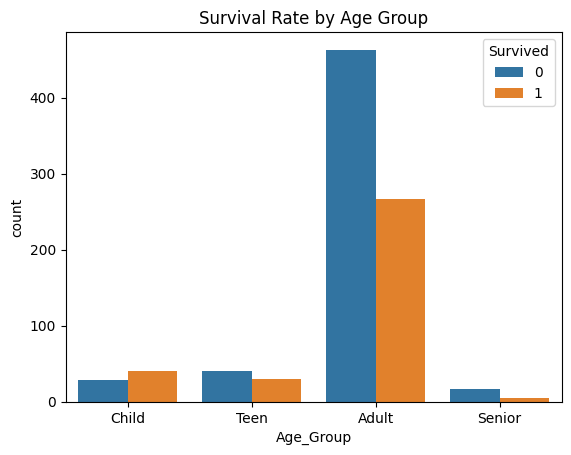

In [45]:
# 요금(Fare) 상위 25%, 하위 25% 구간으로 나누기
df['Fare_Category'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(x='Fare_Category', hue='Survived', data=df)
plt.title('Survival Rate by Fare Category')
plt.show()

# 나이를 어린이, 성인, 노인으로 나누어 분석
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.countplot(x='Age_Group', hue='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

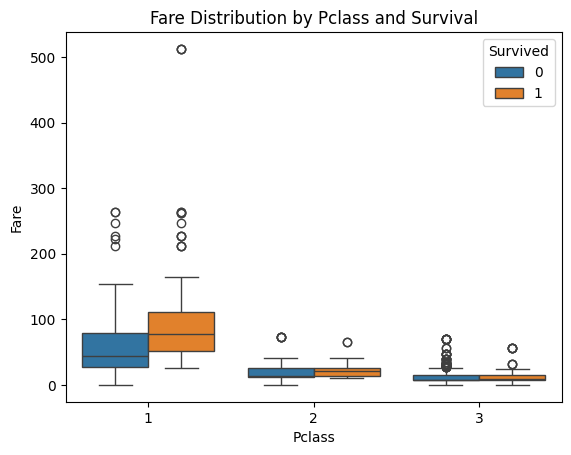

In [46]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Pclass and Survival')
plt.show()

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 예시 (이 코드는 예시용으로 제공됩니다)
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


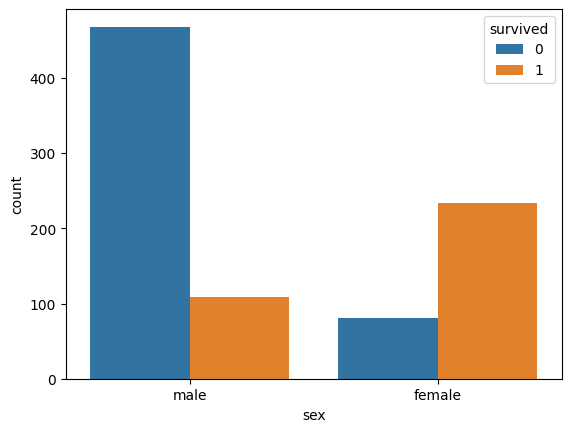

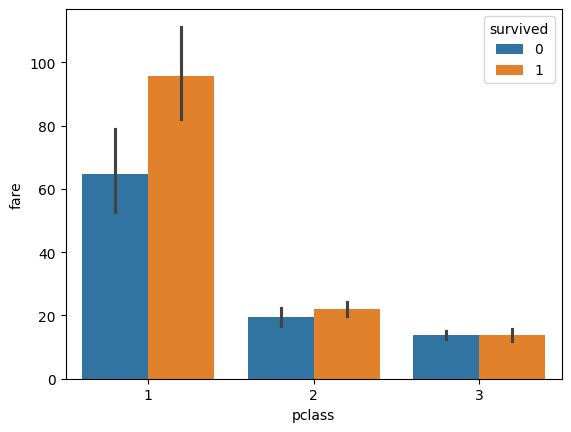

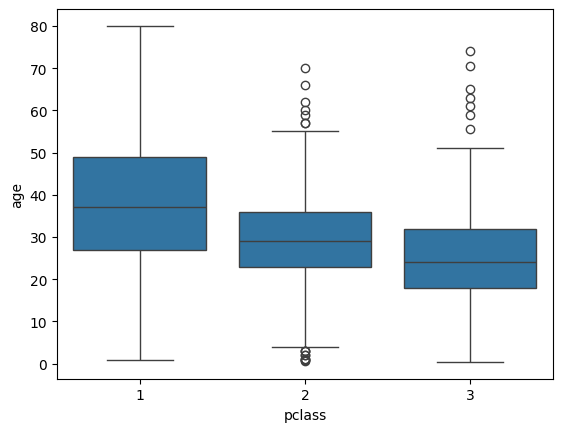

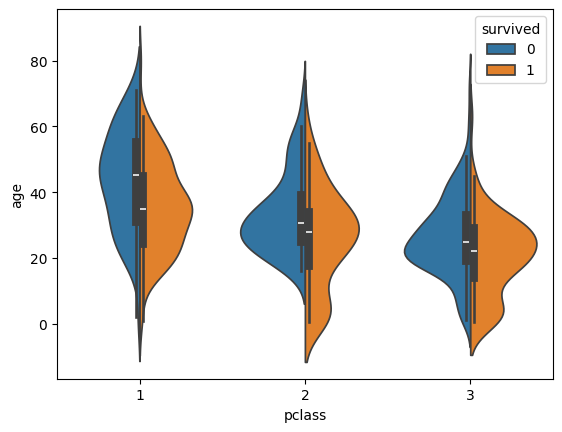

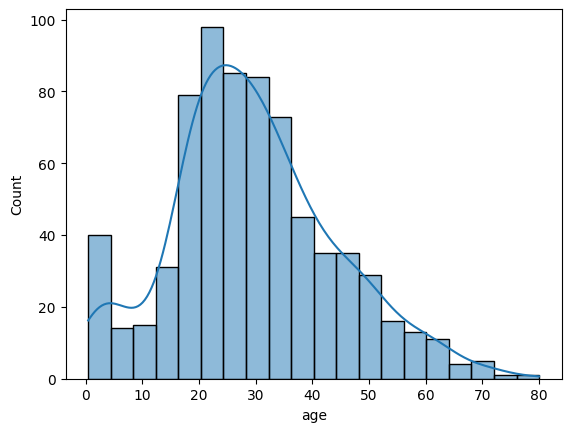

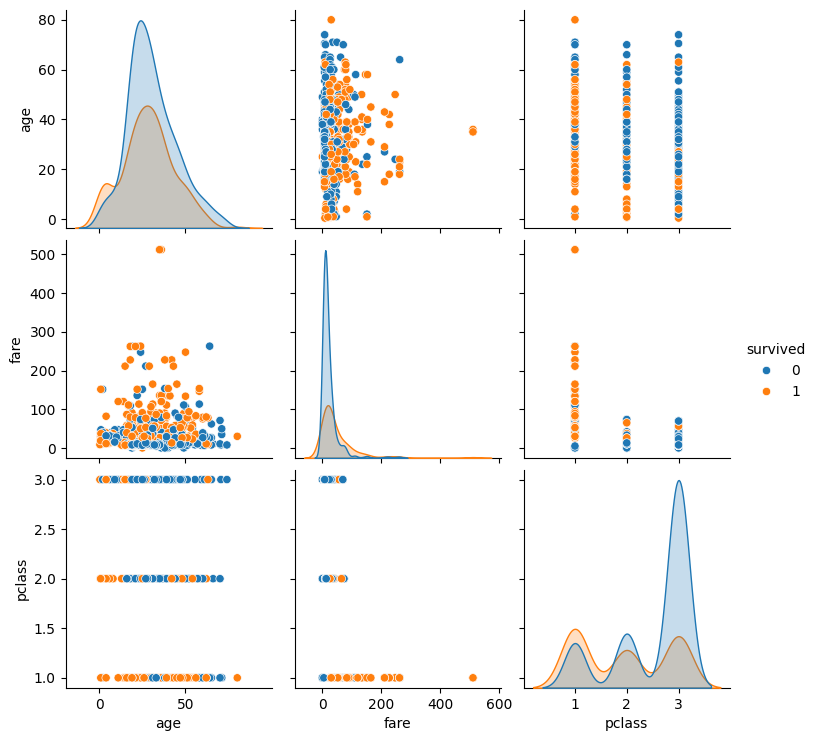

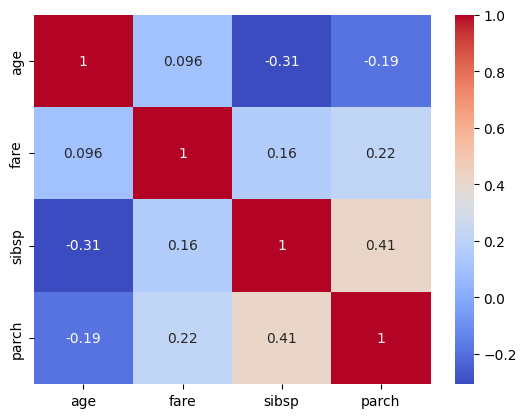

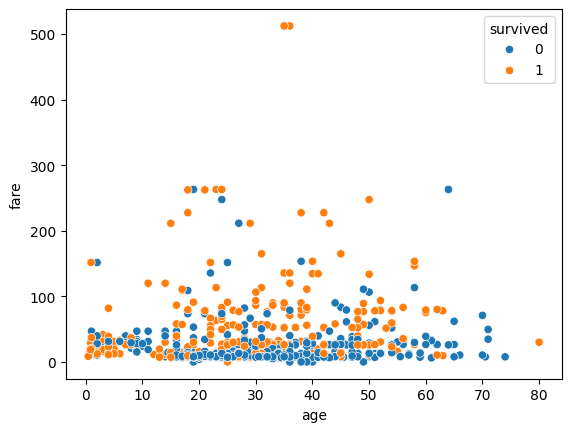

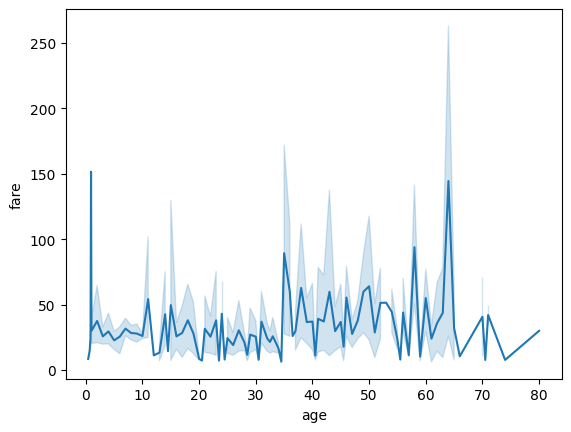

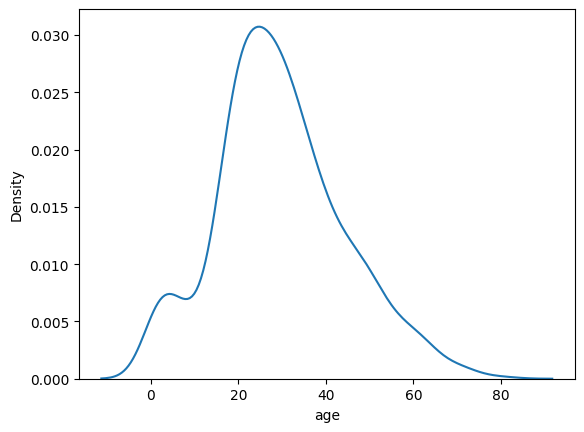

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 예시 (titanic 데이터셋을 사용)
df = sns.load_dataset('titanic')

# 1. Count Plot (범주형 데이터의 빈도)
sns.countplot(x='sex', hue='survived', data=df)
plt.show()

# 2. Bar Plot (평균 요약 통계 시각화)
sns.barplot(x='pclass', y='fare', hue='survived', data=df)
plt.show()

# 3. Box Plot (사분위수와 이상치 확인)
sns.boxplot(x='pclass', y='age', data=df)
plt.show()

# 4. Violin Plot (분포와 밀도를 함께 표현)
sns.violinplot(x='pclass', y='age', hue='survived', data=df, split=True)
plt.show()

# 5. Dist Plot (히스토그램 + 커널 밀도 추정)
sns.histplot(df['age'], kde=True)
plt.show()

# 6. Pair Plot (다변수 산점도 및 히스토그램)
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()

# 7. Heatmap (상관관계 히트맵)
sns.heatmap(df[['age', 'fare', 'sibsp', 'parch']].corr(), annot=True, cmap='coolwarm')
plt.show()

# 8. Scatter Plot (산점도, 두 연속형 변수 간의 관계)
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.show()

# 9. Line Plot (연속 데이터의 트렌드 확인)
sns.lineplot(x='age', y='fare', data=df)
plt.show()

# 10. KDE Plot (커널 밀도 추정 시각화)
sns.kdeplot(df['age'])
plt.show()

In [47]:

# Cabin 변수의 첫 글자(알파벳)만 추출
df['Cabin_First'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
df.drop('Cabin',axis=1, inplace=True)
# Cabin_First 변수의 분포 확인
print(df['Cabin_First'].value_counts())

# 범주형 변수 인코딩 (Sex, Embarked, Cabin_First)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Cabin_First'] = le.fit_transform(df['Cabin_First'])
df['Fare_Category'] = le.fit_transform(df['Fare_Category'])
df['Age_Group'] = le.fit_transform(df['Age_Group'])

# 필요 없는 변수 제거 (PassengerId, Name, Ticket)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
print("column before drop", df.columns)

Cabin_First
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
column before drop Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Cluster', 'Fare_Category', 'Age_Group', 'Cabin_First'],
      dtype='object')


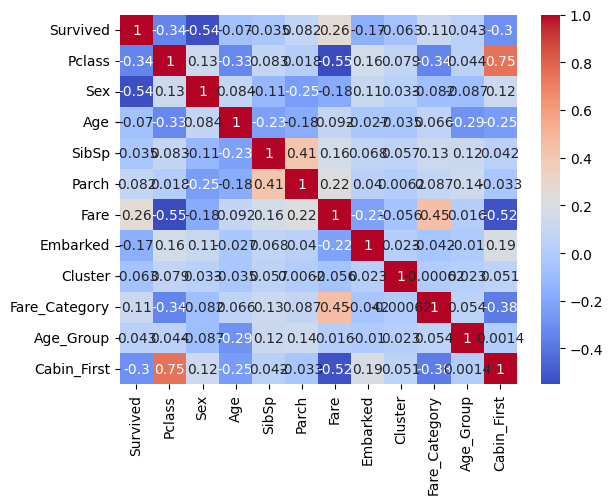

In [48]:
# 간단한 상관관계 확인
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

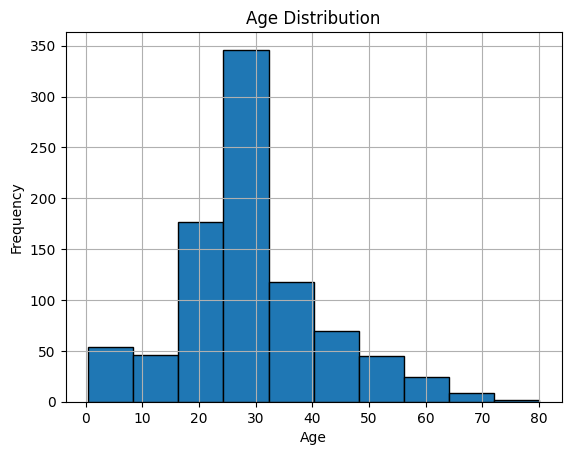

In [49]:
# 나이의 분포를 확인하기
df['Age'].hist( edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [50]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cluster,Fare_Category,Age_Group,Cabin_First
0,0,3,1,22.000000,1,0,7.2500,2,2,1,0,8
1,1,1,0,38.000000,1,0,71.2833,0,2,3,0,2
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,8
3,1,1,0,35.000000,1,0,53.1000,2,2,3,0,2
4,0,3,1,35.000000,0,0,8.0500,2,2,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,2,0,8
887,1,1,0,19.000000,0,0,30.0000,2,1,0,0,1
888,0,3,0,29.699118,1,2,23.4500,2,1,0,0,8
889,1,1,1,26.000000,0,0,30.0000,0,1,0,0,2


In [51]:
# 설명변수와 타겟변수 설정
X = df.drop('Survived', axis=1)
y = df['Survived']


In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cluster,Fare_Category,Age_Group,Cabin_First
0,0,3,1,22.0,1,0,7.2500,2,2,1,0,8
1,1,1,0,38.0,1,0,71.2833,0,2,3,0,2
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,8
3,1,1,0,35.0,1,0,53.1000,2,2,3,0,2
4,0,3,1,35.0,0,0,8.0500,2,2,2,0,8


In [53]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cluster,Fare_Category,Age_Group,Cabin_First
0,3,1,22.000000,1,0,7.2500,2,2,1,0,8
1,1,0,38.000000,1,0,71.2833,0,2,3,0,2
2,3,0,26.000000,0,0,7.9250,2,2,2,0,8
3,1,0,35.000000,1,0,53.1000,2,2,3,0,2
4,3,1,35.000000,0,0,8.0500,2,2,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,2,0,8
887,1,0,19.000000,0,0,30.0000,2,1,0,0,1
888,3,0,29.699118,1,2,23.4500,2,1,0,0,8
889,1,1,26.000000,0,0,30.0000,0,1,0,0,2


In [54]:

# 학습용 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 베이스라인 모델 설정 (랜덤 포레스트)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'베이스라인 모델 정확도: {accuracy:.4f}')

# 모델 성능을 보고 필요한 추가 EDA나 피처 엔지니어링 작업을 진행할 수 있습니다.

베이스라인 모델 정확도: 0.8101


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#파라미터 정의
param = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [10, 20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

# 그리드 서치 cv 정의하고 fit하기
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param, verbose=1, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

# best 파라미터 출력하기
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.8272701485657553


In [56]:
grid_search.best_score_

0.8272701485657553

In [57]:
# 특성	                     RandomForestClassifier       	GradientBoostingClassifier
# 앙상블 기법	               배깅 (Bagging)	              부스팅 (Boosting)
# 트리 학습 방식	            트리들을 독립적으로 학습	         트리들을 순차적으로 학습
# 병렬 처리 가능 여부	         병렬 처리 가능 (독립적 학습)	     병렬 처리 불가 (순차적 학습)
# 과적합 방지	                랜덤 샘플링과 배깅으로 과적합에 강함	부스팅 과정에서 과적합 위험이 있음
# 학습 속도	빠름 (병렬 처리 가능)	느림 (순차적 학습)
# 성능	                       기본적으로 높은 성능, 복잡한 문제에서 성능 향상은 제한적	튜닝을 통해 매우 높은 성능을 낼 수 있음
# 하이퍼파라미터 튜닝	           적은 튜닝으로도 괜찮은 성능을 보임	하이퍼파라미터 튜닝이 매우 중요

In [58]:
# 여러 모델 정의후에 튜닝해보기
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [59]:
# 모델과 파라미터 설정
models_with_params = [
    (LGBMClassifier(), {'n_estimators': [50, 100], 'max_depth': [10, 20], 'learning_rate': [0.1, 0.01]}),
    (XGBClassifier(), {'n_estimators': [50, 100], 'max_depth': [10, 20], 'learning_rate': [0.1, 0.01]}),
    (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}),
    (RandomForestClassifier(), {'n_estimators': [20, 50, 100], 'max_depth': [10, 20], 'min_samples_split': [2, 5]})
]

# 모델별로 그리드 서치 실행
for model, param in models_with_params:
    grid_search = GridSearchCV(model, param, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"{model.__class__.__name__} Best Params: {grid_search.best_params_}")
    print(f"{model.__class__.__name__} Best Score: {grid_search.best_score_:.4f}")


[LightGBM] [Info] Number of positive: 179, number of negative: 296
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 475, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376842 -> initscore=-0.502974
[LightGBM] [Info] Start training from score -0.502974
[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Number of positive: 179, number of negative: 296[LightGBM] [Info] Number of positive: 179, number of negative: 296
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 11
[LightGBM] [Info] [binary:

- LGBMClassifier Best Params: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 50}
- LGBMClassifier Best Score: 0.8160
- XGBClassifier Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
- XGBClassifier Best Score: 0.8161
- GradientBoostingClassifier Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
- GradientBoostingClassifier Best Score: 0.7922
- RandomForestClassifier Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
- RandomForestClassifier Best Score: 0.8202


In [63]:
# rfc가 가장 적절
final_model_with_param = models_with_params[0]

In [64]:
final_model, param = final_model_with_param  # final_model_with_param에서 모델과 파라미터 분리
grid_search = GridSearchCV(final_model, param, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 예측하기 (학습된 최적 모델로 테스트 데이터에 대해 예측)
y_pred = grid_search.best_estimator_.predict(X_test)

# 성능 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 179, number of negative: 296
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 475, number of used features: 11
[LightGBM]

RandomForestClassifier는 다양한 트리를 결합한 앙상블 모델로, 과적합을 방지하면서도 높은 정확도를 보여주었습니다. 최종 성능은 Accuracy 0.82, F1 Score 0.77로, 타이타닉 생존 여부 예측에서 상당히 좋은 결과를 보여줍니다.

Precision(정밀도)이 높다는 것은 생존한 승객을 잘 예측하고 있다는 의미이며, Recall(재현율)은 실제 생존자를 놓치지 않고 예측하는 능력을 나타냅니다. ROC-AUC가 0.85 이상이면, 모델이 분류 문제에서 좋은 성능을 보이고 있다고 해석할 수 있습니다.

최종적으로, 이 모델은 재난 상황에서 생존 여부를 예측하는 데 활용할 수 있으며, 실제 상황에서는 승객의 특성을 바탕으로 구조 우선순위를 정하는 데 기여할 수 있을 것입니다.
